<a href="https://colab.research.google.com/github/ismachy/Introduction-to-ML/blob/main/HW_7_Problem_1_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import time

In [ ]:
# CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
# Build the Extended Convolutional Neural Network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # Additional Convolutional Layer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))  # Adjusted for intermediate feature dimensions
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
start_time = time.time()
output = model.fit(train_images, train_labels, epochs=300, validation_data=(test_images, test_labels))
end_time = time.time()

Epoch 1/300
1563/1563 [==============================] - 23s 8ms/step - loss: 1.5555 - accuracy: 0.4277 - val_loss: 1.2705 - val_accuracy: 0.5417
Epoch 2/300
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1570 - accuracy: 0.5883 - val_loss: 1.1166 - val_accuracy: 0.6084
Epoch 3/300
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9988 - accuracy: 0.6469 - val_loss: 1.0201 - val_accuracy: 0.6392
Epoch 4/300
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8934 - accuracy: 0.6867 - val_loss: 0.9740 - val_accuracy: 0.6636
Epoch 5/300
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8069 - accuracy: 0.7180 - val_loss: 0.9105 - val_accuracy: 0.6813
Epoch 6/300
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7464 - accuracy: 0.7372 - val_loss: 0.8953 - val_accuracy: 0.6943
Epoch 7/300
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6911 - accuracy: 0.7559 - val_loss: 0.8990 - v

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 3.7313 - accuracy: 0.6916


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# Predict on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels, average='macro')

# Report results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"F1 Score: {f1}")


313/313 [==============================] - 1s 3ms/step
Accuracy: 0.6916
Confusion Matrix:
[[747  16  59  31  29   5  12  15  53  33]
 [ 18 852   8  11   7  10  13   1  13  67]
 [ 58   7 586  88  74  70  65  30   9  13]
 [ 23   7  85 535  74 141  75  34   8  18]
 [ 17   3 104 114 588  33  60  65   9   7]
 [  9   8  61 217  45 565  38  47   1   9]
 [  9   6  58  60  30  19 801   9   4   4]
 [ 23   9  25  65  66  86  10 695   2  19]
 [ 62  32  14  29  14   9  12   5 794  29]
 [ 35 114  11  22   8   6   4  15  32 753]]
F1 Score: 0.6929111634819016


In [ ]:
# Report results
print(f"Training Time: {end_time - start_time} seconds")
print(f"Training Loss after 300 epochs: {output.history['loss'][-1]}")
print(f"Evaluation Accuracy after 300 epochs: {test_acc}")

Training Time: 3205.102166891098 seconds
Training Loss after 300 epochs: 0.06472428143024445
Evaluation Accuracy after 300 epochs: 0.6916000247001648


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

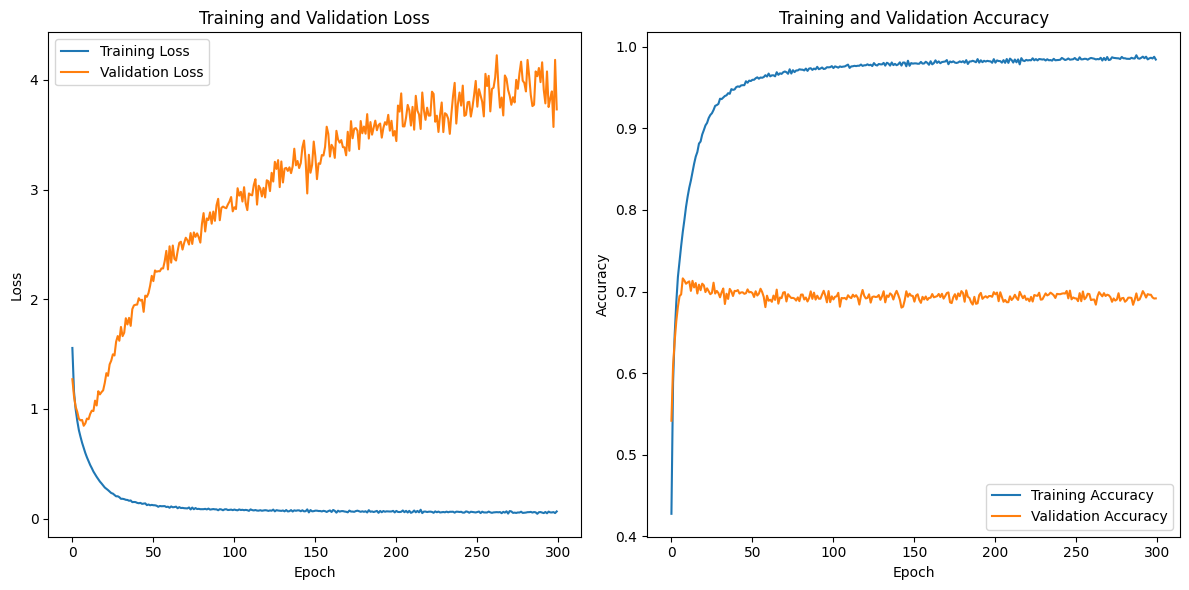

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(output.history['loss'], label='Training Loss')
plt.plot(output.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(output.history['accuracy'], label='Training Accuracy')
plt.plot(output.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
